In [2]:
import pandas as pd
import seaborn as sb

In [3]:
df = pd.read_csv('C:\\csv-data-collect\\github-2023.csv',index_col=0)
df.duplicated().sum()
df.shape
df.head(1)

,id,full_name,url,clone_url,watchers_count,stargazers_count,language,forks,created_at,updated_at,pushed_at,description,languages_url,open_issues_count,topics,license
0,584145946,sumn2u/learn-javascript,https://github.com/sumn2u/learn-javascript,https://github.com/sumn2u/learn-javascript.git,619,619,HTML,29,2023-01-01T15:16:26Z,2023-06-16T03:16:58Z,2023-06-08T01:17:48Z,A book that teaches JavaScript,https://api.github.com/repos/sumn2u/learn-java...,1,"['beginner', 'beginner-friendly', 'book', 'col...","{'key': 'apache-2.0', 'name': 'Apache License ..."


In [4]:
df.drop(columns=['watchers_count'],inplace=True)
df.head(1)

,id,full_name,url,clone_url,stargazers_count,language,forks,created_at,updated_at,pushed_at,description,languages_url,open_issues_count,topics,license
0,584145946,sumn2u/learn-javascript,https://github.com/sumn2u/learn-javascript,https://github.com/sumn2u/learn-javascript.git,619,HTML,29,2023-01-01T15:16:26Z,2023-06-16T03:16:58Z,2023-06-08T01:17:48Z,A book that teaches JavaScript,https://api.github.com/repos/sumn2u/learn-java...,1,"['beginner', 'beginner-friendly', 'book', 'col...","{'key': 'apache-2.0', 'name': 'Apache License ..."


# <h4 style='color:red'>drop Null Values from Language</h4>

In [5]:
null_language = df.loc[df['language'].isna()].index
df.drop(null_language,inplace=True)

# <h4 style='color:orange'>shape of df after remove the null from language </h4>

In [213]:
df.shape

(131106, 16)

# <h4 style='color:orange'>Outlier Values base on Number of Forks And Number stargazers</h4>

<Axes: >

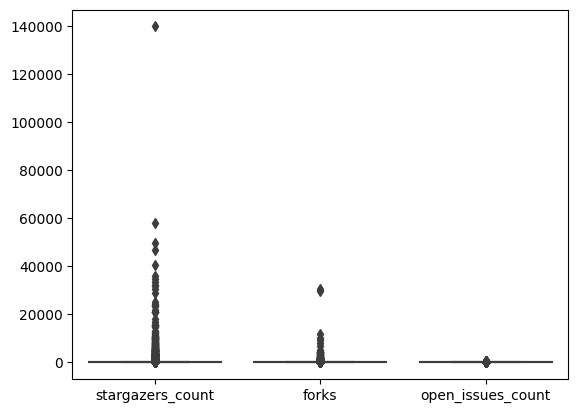

In [214]:
sb.boxplot(df[['stargazers_count','forks','open_issues_count']])

# <h4 style='color:orange'>Star gazers Outlier</h4>

In [215]:
Q1 = df['stargazers_count'].quantile(0.25)
Q3 = df['stargazers_count'].quantile(0.75)
IQR = Q3 - Q1


Lower_Whisker = Q1 - (1.5 * IQR)
Upper_Whisker = Q3 + (1.5 * IQR)

print(Lower_Whisker, Upper_Whisker)
df.shape
#df.shape
df_Q_Outliers_stargazers_count = df.loc[(df['stargazers_count'] < Lower_Whisker)|(df['stargazers_count'] > Upper_Whisker)]

-5.0 19.0


In [170]:
df_stargazers_count  = df.loc[(df['stargazers_count'] > Lower_Whisker)|(df['stargazers_count'] < Upper_Whisker)]

# <h4 style='color:orange'>Forks Outlier</h4>

In [216]:
Q1 = df['forks'].quantile(0.25)
Q3 = df['forks'].quantile(0.75)
IQR = Q3 - Q1


Lower_Whisker = Q1 - (1.5 * IQR)
Upper_Whisker = Q3 + (1.5 * IQR)

print(Lower_Whisker, Upper_Whisker)
df.shape
#df.shape
df_Q_Outliers_forks_count = df.loc[(df['forks'] < Lower_Whisker)|(df['forks'] > Upper_Whisker)]
df_without_outlier = df[df['forks'] < Upper_Whisker]
df_without_outlier

-3.0 5.0


,id,full_name,url,clone_url,watchers_count,stargazers_count,language,forks,created_at,updated_at,pushed_at,description,languages_url,open_issues_count,topics,license
16,584034634,TimMikeladze/gist-database,https://github.com/TimMikeladze/gist-database,https://github.com/TimMikeladze/gist-database.git,90,90,TypeScript,0,2023-01-01T02:34:59Z,2023-06-08T08:15:44Z,2023-06-03T03:35:29Z,✨ Transform gist into your personal key/value ...,https://api.github.com/repos/TimMikeladze/gist...,4,"['datastore', 'gist', 'gist-data', 'gist-datab...","{'key': 'mit', 'name': 'MIT License', 'spdx_id..."
24,584139370,corleytd/PyTorchBasic,https://github.com/corleytd/PyTorchBasic,https://github.com/corleytd/PyTorchBasic.git,80,80,Python,1,2023-01-01T14:45:07Z,2023-05-23T23:38:01Z,2023-01-13T04:55:20Z,This repository provides tutorial for deep lea...,https://api.github.com/repos/corleytd/PyTorchB...,0,[],NaN
26,584172068,avialxee/scoobi,https://github.com/avialxee/scoobi,https://github.com/avialxee/scoobi.git,70,70,Python,2,2023-01-01T17:27:36Z,2023-05-26T09:16:39Z,2023-05-24T19:54:48Z,Solar Conventionality-based Organizing Observa...,https://api.github.com/repos/avialxee/scoobi/l...,0,[],"{'key': 'bsd-3-clause', 'name': 'BSD 3-Clause ..."
34,584167315,zmedelis/bosquet,https://github.com/zmedelis/bosquet,https://github.com/zmedelis/bosquet.git,54,54,Clojure,3,2023-01-01T17:03:29Z,2023-06-12T22:27:47Z,2023-06-15T06:14:57Z,"LLMOps tools to build, chain, evaluate and dep...",https://api.github.com/repos/zmedelis/bosquet/...,5,"['clojure', 'gpt', 'llmops', 'prompt', 'prompt...","{'key': 'epl-1.0', 'name': 'Eclipse Public Lic..."
36,584079348,dai-shi/valtio-signal,https://github.com/dai-shi/valtio-signal,https://github.com/dai-shi/valtio-signal.git,53,53,TypeScript,0,2023-01-01T08:48:12Z,2023-05-25T06:33:00Z,2023-02-25T23:43:39Z,Another React binding for Valtio proxy state,https://api.github.com/repos/dai-shi/valtio-si...,1,[],"{'key': 'mit', 'name': 'MIT License', 'spdx_id..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149994,647248273,vaniacrist/tabuada-portugol,https://github.com/vaniacrist/tabuada-portugol,https://github.com/vaniacrist/tabuada-portugol...,2,2,Portugol,0,2023-05-30T11:26:36Z,2023-06-13T14:09:54Z,2023-05-30T14:58:11Z,NaN,https://api.github.com/repos/vaniacrist/tabuad...,0,[],NaN
149995,647053735,diegohap/ej_JAVA_Egg_basic,https://github.com/diegohap/ej_JAVA_Egg_basic,https://github.com/diegohap/ej_JAVA_Egg_basic.git,2,2,Java,1,2023-05-30T00:57:42Z,2023-06-06T00:59:46Z,2023-06-13T22:16:50Z,NaN,https://api.github.com/repos/diegohap/ej_JAVA_...,0,[],NaN
149996,647050210,BOWSTRINGHERO/Java_Example,https://github.com/BOWSTRINGHERO/Java_Example,https://github.com/BOWSTRINGHERO/Java_Example.git,2,2,Java,0,2023-05-30T00:41:42Z,2023-05-31T05:40:45Z,2023-06-16T03:25:53Z,NaN,https://api.github.com/repos/BOWSTRINGHERO/Jav...,0,[],NaN
149997,647350670,wasix-org/dash,https://github.com/wasix-org/dash,https://github.com/wasix-org/dash.git,2,2,C,0,2023-05-30T15:33:39Z,2023-05-30T18:19:52Z,2023-05-30T15:34:10Z,Dash on Webassembly with WASIX,https://api.github.com/repos/wasix-org/dash/la...,0,[],"{'key': 'other', 'name': 'Other', 'spdx_id': '..."


In [217]:
print(df_Q_Outliers_stargazers_count.loc[df_Q_Outliers_stargazers_count['language'] == 'TypeScript'].shape)
print(df_Q_Outliers_forks_count.loc[df_Q_Outliers_forks_count['language'] == 'TypeScript'].shape)

(2109, 16)
(1378, 16)


In [17]:
df.loc[df['language'].str.contains('Jupyter')]

,id,full_name,url,clone_url,stargazers_count,language,forks,created_at,updated_at,pushed_at,description,languages_url,open_issues_count,topics,license
6,584022883,yacineMTB/scribepod,https://github.com/yacineMTB/scribepod,https://github.com/yacineMTB/scribepod.git,146,Jupyter Notebook,14,2023-01-01T00:34:43Z,2023-06-14T06:17:11Z,2023-03-04T22:08:55Z,Some of the scripts I use for scribepod @ http...,https://api.github.com/repos/yacineMTB/scribep...,0,[],NaN
49,584190320,Halvani/Constituent-Treelib,https://github.com/Halvani/Constituent-Treelib,https://github.com/Halvani/Constituent-Treelib...,38,Jupyter Notebook,8,2023-01-01T19:01:28Z,2023-06-12T18:21:01Z,2023-03-24T01:24:01Z,"A lightweight Python library for constructing,...",https://api.github.com/repos/Halvani/Constitue...,1,"['constituency-parser', 'constituency-tree', '...","{'key': 'mit', 'name': 'MIT License', 'spdx_id..."
59,584222414,atilatech/atila-core-service,https://github.com/atilatech/atila-core-service,https://github.com/atilatech/atila-core-servic...,32,Jupyter Notebook,1,2023-01-01T22:22:12Z,2023-06-09T06:14:38Z,2023-06-06T16:44:25Z,The primary backend service for Atila apps.,https://api.github.com/repos/atilatech/atila-c...,4,"['django', 'postgres', 'postgresql', 'python']","{'key': 'gpl-3.0', 'name': 'GNU General Public..."
170,584177034,valentinafeve/fine_tunning_YOLOS_for_fashion,https://github.com/valentinafeve/fine_tunning_...,https://github.com/valentinafeve/fine_tunning_...,12,Jupyter Notebook,0,2023-01-01T17:51:49Z,2023-06-15T17:42:52Z,2023-06-13T18:52:49Z,More than 1000 downloads :sparkles: . In this ...,https://api.github.com/repos/valentinafeve/fin...,0,"['fine-tunning', 'yolos']",NaN
184,584101729,TuringLang/Turing-Workshop,https://github.com/TuringLang/Turing-Workshop,https://github.com/TuringLang/Turing-Workshop.git,11,Jupyter Notebook,2,2023-01-01T11:19:59Z,2023-06-11T10:37:43Z,2023-02-23T10:13:49Z,Turing Workshop,https://api.github.com/repos/TuringLang/Turing...,0,[],"{'key': 'cc-by-sa-4.0', 'name': 'Creative Comm..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149915,647193247,AndreaBe99/multimodal-interaction-project,https://github.com/AndreaBe99/multimodal-inter...,https://github.com/AndreaBe99/multimodal-inter...,2,Jupyter Notebook,1,2023-05-30T08:58:41Z,2023-06-14T14:24:47Z,2023-06-16T11:39:46Z,"Project for the Multimodal Interaction course,...",https://api.github.com/repos/AndreaBe99/multim...,0,[],NaN
149932,647313506,Usama-Amjad/Traffic_Sign_Classification_Using_...,https://github.com/Usama-Amjad/Traffic_Sign_Cl...,https://github.com/Usama-Amjad/Traffic_Sign_Cl...,2,Jupyter Notebook,0,2023-05-30T14:07:40Z,2023-06-05T17:23:06Z,2023-05-31T06:44:08Z,NaN,https://api.github.com/repos/Usama-Amjad/Traff...,0,[],NaN
149963,647405542,BlackIQ/tgju-api,https://github.com/BlackIQ/tgju-api,https://github.com/BlackIQ/tgju-api.git,2,Jupyter Notebook,0,2023-05-30T17:59:05Z,2023-05-31T18:25:52Z,2023-05-31T04:50:05Z,TGJU API,https://api.github.com/repos/BlackIQ/tgju-api/...,0,"['api', 'coin', 'currency', 'flask', 'gold', '...",NaN
149978,647427900,unnati914/supply-chain-management,https://github.com/unnati914/supply-chain-mana...,https://github.com/unnati914/supply-chain-mana...,2,Jupyter Notebook,0,2023-05-30T19:03:15Z,2023-05-31T03:18:14Z,2023-06-04T14:11:27Z,NaN,https://api.github.com/repos/unnati914/supply-...,0,[],"{'key': 'mit', 'name': 'MIT License', 'spdx_id..."


(116197, 16)

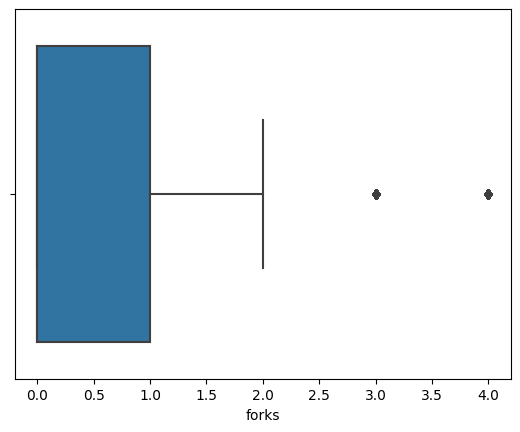

In [222]:
import seaborn as sns
sns.boxplot(data=df_without_outlier,x=df_without_outlier['forks'])
df_without_outlier.shape

In [228]:
df.loc[df['language'].str.contains('english')]

,id,full_name,url,clone_url,stargazers_count,language,forks,created_at,updated_at,pushed_at,description,languages_url,open_issues_count,topics,license


# <h4 style='color:orange'>convert time for creation & updated & pushed date</h4>

In [32]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])
df['pushed_at'] = pd.to_datetime(df['pushed_at'])
print('\x1b[31m\"created:--------------------------------\"\x1b[0m')
print(df['created_at'].head(2))
print('\x1b[31m\"updated:--------------------------------\"\x1b[0m')
print(df['updated_at'].head(2))
print('\x1b[31m\"pushed:--------------------------------\"\x1b[0m')
print(df['pushed_at'].head(2))


"created:--------------------------------"
0   2023-01-01 15:16:26+00:00
2   2023-01-01 18:55:44+00:00
Name: created_at, dtype: datetime64[ns, UTC]
"updated:--------------------------------"
0   2023-06-16 03:16:58+00:00
2   2023-06-16 09:45:30+00:00
Name: updated_at, dtype: datetime64[ns, UTC]
"pushed:--------------------------------"
0   2023-06-08 01:17:48+00:00
2   2023-06-16 08:38:14+00:00
Name: pushed_at, dtype: datetime64[ns, UTC]


In [23]:
df['language'].unique().tolist()

['HTML',
 'TypeScript',
 'Python',
 'JavaScript',
 'Jupyter Notebook',
 'C',
 'Go',
 'C#',
 'Kotlin',
 'Java',
 'Dart',
 'Vue',
 'YARA',
 'Clojure',
 'Rust',
 'F#',
 'C++',
 'Lua',
 'Shell',
 'V',
 'CSS',
 'PHP',
 'Solidity',
 'Nim',
 'Emacs Lisp',
 'Nix',
 'PowerShell',
 'Makefile',
 'Swift',
 'Zig',
 'Haxe',
 'MATLAB',
 'nesC',
 'TeX',
 'Scala',
 'Pascal',
 'R',
 'Haskell',
 'Astro',
 'Vim Script',
 'HLSL',
 'SystemVerilog',
 'Verilog',
 'TSQL',
 'Common Lisp',
 'Svelte',
 'SCSS',
 'GLSL',
 'PLpgSQL',
 'EJS',
 'Raku',
 'QML',
 'Apex',
 'Jinja',
 'Visual Basic 6.0',
 'RobotFramework',
 'Ruby',
 'HCL',
 'Mathematica',
 'Batchfile',
 'Assembly',
 'OCaml',
 'Cairo',
 'Smarty',
 'Julia',
 'Macaulay2',
 'PureScript',
 'Stylus',
 'XS',
 'Dockerfile',
 'Roff',
 'CodeQL',
 'Nunjucks',
 'Mustache',
 'GDScript',
 'ReScript',
 'Move',
 'ZenScript',
 'Handlebars',
 'Perl',
 'AutoHotkey',
 'ShaderLab',
 'ASL',
 'Forth',
 'PLSQL',
 'Blade',
 'Inno Setup',
 'Elixir',
 'ASP.NET',
 'Scheme',
 'VBA',
 